In [82]:
import math
import numpy as np
import random as rnd
import matplotlib.pyplot as plt


In [83]:
class SearchAlgorithms:
    def stochasticHillClimbing(problem, stuckIterations=10):
        current = problem.initialState()
        oldNeighbor = current.copy()
        stuck = 0
        while True:
            # Obtain best neighbor state from current one
            neighbor = problem.bestNeighbor(current)
            # print(neighbor, current, '|', problem.stateValue(neighbor), problem.stateValue(current))

            # Check if it's stuck in an infinite loop
            if np.array_equal(neighbor, oldNeighbor):
                stuck += 1
            else:
                stuck = 0

            # Return state if it's stuck in a maximum (local or global) or in a loop
            if problem.stateValue(neighbor) < problem.stateValue(current) or stuck > stuckIterations:
                # problem.printState(current)
                return current

            oldNeighbor = current.copy()
            current = neighbor.copy()

    def hillClimbingWithRandomRestart(problem, iterations=25):
        bestSolution = SearchAlgorithms.stochasticHillClimbing(problem)
        bestValue = problem.stateValue(bestSolution)
        for i in range(iterations):
            # Obtain solution from stochastic hill climbing
            solution = SearchAlgorithms.stochasticHillClimbing(problem)

            # If solution is better than the best one
            solutionValue = problem.stateValue(solution)
            if solutionValue > bestValue:
                bestSolution = solution.copy()
                bestValue = solutionValue

        # Return best solution state after iterations
        problem.printState(bestSolution, 'Hill climbing')
        return bestSolution

    def simulatedAnnealing(problem, schedule):
        current = problem.initialState()
        t = 0
        while True:
            t += 1
            T = schedule(t)

            if T <= 0:
                problem.printState(current, 'Simulated annealing')
                return current

            neighbor = problem.randomNeighbor(current)
            deltaE = problem.stateValue(neighbor) - problem.stateValue(current)

            # print(deltaE, math.exp(deltaE/T), T)
            if deltaE > 0 or rnd.random() <= math.exp(deltaE/T):
                current = neighbor.copy()

    def schedule(time):
        T0 = 100
        alpha = 0.99
        return T0 * alpha ** time


In [84]:
class NQueens:
    def __init__(self, N):
        self.maxValue = 0
        # self.state = np.array([i for i in range(1, N+1)])
        # np.random.shuffle(self.state)
        self.state = np.array([rnd.randint(1, N) for i in range(N)])
        self.printState(self.state, 'Initial board')

    def printState(self, state, msg=''):
        # print(msg, state, '|', self.stateValue(state))

        # Build matrix to plot
        board = np.array([[1 if j+1 == state[i] else 0 for j in range(len(state))] for i in range(len(state))])
        plt.figure()
        plt.title(msg + '\nAttacks: ' + str(self.stateValue(state) * -1))
        plt.imshow(board)
        # plt.axis(False)

        plt.show()

    def initialState(self):
        # Always return the same start state
        return self.state.copy()

    def randomNeighbor(self, state):
        randomState = state.copy()

        # Choose random index
        index = rnd.randint(0, len(state)-1)
        pos = randomState[index]

        # Move queen to a random position
        newPos = rnd.randint(1, len(state))
        while newPos == pos:
            newPos = rnd.randint(1, len(state))

        randomState[index] = newPos
        return randomState

    def bestNeighbor(self, state):
        bestState = state.copy()

        # Change the first queen to guarantee that the bestState will always be different than the original state
        bestState[0] = len(state)+1 - bestState[0]

        bestValue = self.stateValue(bestState)

        # Randomize order to find the best neighbor
        indexes = np.array([i for i in range(len(state))])
        np.random.shuffle(indexes)

        for index in indexes:
            newState = state.copy()
            for pos in range(1, len(state)+1):
                if pos != state[index]:
                    # Move queen
                    newState[index] = pos

                    # If the new state is better than the current best
                    newValue = self.stateValue(newState)
                    if newValue > bestValue:
                        bestState = newState.copy()
                        bestValue = newValue

        return bestState

    def stateValue(self, state):
        value = 0
        for i in range(len(state) - 1):
            for j in range(i+1, len(state)):
                if state[j] == state[i] or abs(state[j] - state[i]) == j - i:
                    value += 1

        value *= -1
        return value


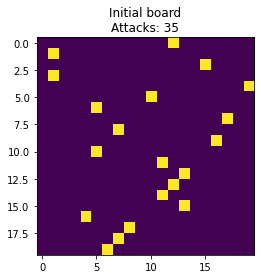

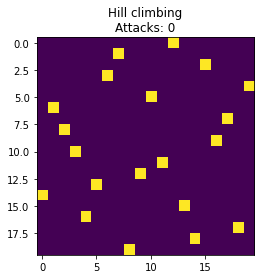

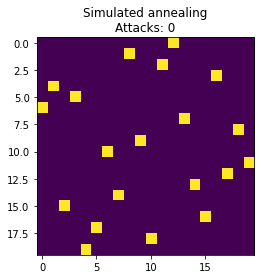

array([13,  9, 12, 17,  2,  4,  1, 14, 19, 10,  7, 20, 18, 15,  8,  3, 16,
        6, 11,  5])

In [85]:
nq = NQueens(20)
SearchAlgorithms.hillClimbingWithRandomRestart(nq)
SearchAlgorithms.simulatedAnnealing(nq, SearchAlgorithms.schedule)


In [86]:
class TravellingSalesman:
    def __init__(self, N, size=100):
        self.state = np.array([], dtype=int)

        for i in range(N):
            # Check that every city is different
            city = [rnd.randint(0, size), rnd.randint(0, size)]
            while city in self.state:
                city = [rnd.randint(0, size), rnd.randint(0, size)]

            self.state = np.append(self.state, city)
            self.state = np.reshape(self.state, (i+1, 2))

        self.printState(self.state, 'Cities', False)

    def printState(self, state, msg='', showPath=True):
        # print(msg, state, '|', self.stateValue(state))

        plt.figure()

        if showPath:
            plt.title(msg + '\nDistance: ' + str(self.stateValue(state) * -1))
            # Append first city at the end
            length = len(state)
            state = np.append(state, state[0])
            state = np.reshape(state, (length+1, 2))

            plt.plot(*zip(*state), 'o-')
            for i in range(len(state)-1):
                plt.annotate(f'  {i+1}', (state[i][0], state[i][1]))
        else:
            plt.title(msg)
            plt.plot(*zip(*state), 'o')

        plt.show()

    def initialState(self):
        # Always return the same cities with different order
        np.random.shuffle(self.state)
        return self.state.copy()

    def distanceBetweenCities(self, city1, city2):
        # Calculate distance between two cities
        return math.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

    def randomNeighbor(self, state):
        randomState = state.copy()

        # Choose two random cities
        choices = np.array([i for i in range(len(state))])
        np.random.shuffle(choices)

        index = rnd.randint(0, len(state) - 1)
        city1Index = choices[index]
        city2Index = choices[len(state)-1 - index]

        # Swap cities
        tempCity = randomState[city1Index].copy()
        randomState[city1Index] = randomState[city2Index].copy()
        randomState[city2Index] = tempCity

        return randomState

    def bestNeighbor(self, state):
        bestState = state.copy()

        # Swap second two cities to guarantee that the bestState will always be different than the original state
        tempCity = bestState[1].copy()
        bestState[1] = bestState[2].copy()
        bestState[2] = tempCity

        bestValue = self.stateValue(bestState)

        # Randomize order to find the best neighbor
        indexes = np.array([i for i in range(len(state) - 1)])
        np.random.shuffle(indexes)

        for i in indexes:
            for j in range(i+1, len(state)):
                newState = state.copy()

                # Swap cities
                tempCity = newState[i].copy()
                newState[i] = newState[j].copy()
                newState[j] = tempCity

                # If new state is better than the current best
                newValue = self.stateValue(newState)
                if newValue > bestValue:
                    bestState = newState.copy()
                    bestValue = newValue

        return bestState

    def stateValue(self, state):
        # Append first city at the end
        length = len(state)
        state = np.append(state, state[0])
        state = np.reshape(state, (length+1, 2))

        totalDistance = 0
        for i in range(len(state)-1):
            totalDistance += self.distanceBetweenCities(state[i], state[i+1])

        totalDistance *= -1
        return totalDistance


C:\Users\Kiko\AppData\Local\Temp/ipykernel_18256/651801890.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  while city in self.state:


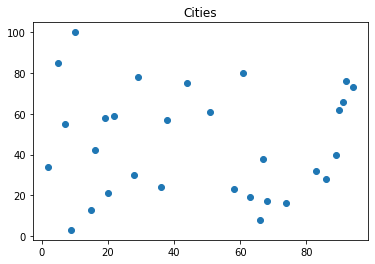

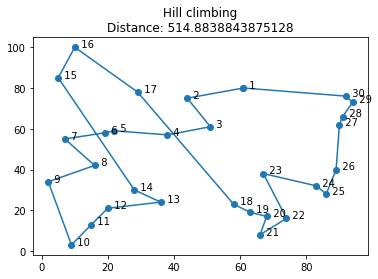

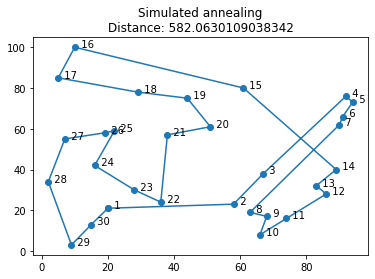

array([[ 20,  21],
       [ 58,  23],
       [ 67,  38],
       [ 92,  76],
       [ 94,  73],
       [ 91,  66],
       [ 90,  62],
       [ 63,  19],
       [ 68,  17],
       [ 66,   8],
       [ 74,  16],
       [ 86,  28],
       [ 83,  32],
       [ 89,  40],
       [ 61,  80],
       [ 10, 100],
       [  5,  85],
       [ 29,  78],
       [ 44,  75],
       [ 51,  61],
       [ 38,  57],
       [ 36,  24],
       [ 28,  30],
       [ 16,  42],
       [ 22,  59],
       [ 19,  58],
       [  7,  55],
       [  2,  34],
       [  9,   3],
       [ 15,  13]])

In [87]:
ts = TravellingSalesman(30)
SearchAlgorithms.hillClimbingWithRandomRestart(ts)
SearchAlgorithms.simulatedAnnealing(ts, SearchAlgorithms.schedule)
